In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("dataset/one_million_mushrooms.csv", sep=";")
df.columns = df.columns.str.replace('-', '_')


# Proyecto Final - Clasificación de Hongos
## Machine Learning I - CEIA

### Objetivo
Desarrollar modelos de clasificación para predecir si un hongo es comestible o venenoso basándose en sus características físicas.

---
## 1. Análisis Exploratorio de Datos (EDA)

### 1.1 Inspección inicial del dataset

In [6]:
# Dimensiones del dataset
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de registros: {df.shape[0]:,}")
print(f"Número de características: {df.shape[1]}")

# Primeras filas
print("\nPrimeras 5 filas:")
df.head()

Dimensiones del dataset: (1038000, 21)
Número de registros: 1,038,000
Número de características: 21

Primeras 5 filas:


,class,cap_diameter,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_height,...,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
0,p,5.68,c,e,w,t,x,c,r,6.73,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u
1,e,5.62,f,s,n,f,s,c,w,6.10,...,b,i,n,NaN,NaN,f,f,NaN,m,u
2,p,17.29,x,s,n,f,p,NaN,y,6.80,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3,p,6.16,b,s,n,f,NaN,NaN,w,9.33,...,NaN,s,w,NaN,NaN,t,z,NaN,d,s
4,p,4.46,o,t,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u


In [7]:
# Información general del dataset
print("Información del dataset:")
df.info()

print("\n" + "="*80)
print("\nTipos de datos:")
print(df.dtypes.value_counts())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap_diameter          1038000 non-null  float64
 2   cap_shape             1038000 non-null  object 
 3   cap_surface           798000 non-null   object 
 4   cap_color             1038000 non-null  object 
 5   does_bruise_or_bleed  1038000 non-null  object 
 6   gill_attachment       870000 non-null   object 
 7   gill_spacing          612000 non-null   object 
 8   gill_color            1038000 non-null  object 
 9   stem_height           1038000 non-null  float64
 10  stem_width            1038000 non-null  float64
 11  stem_root             162000 non-null   object 
 12  stem_surface          390000 non-null   object 
 13  stem_color            1038000 non-null  object 
 14  veil_type

In [8]:
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
df.describe(include='all').T

Estadísticas descriptivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,1038000,2,p,576000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_diameter,1038000.0,NaN,NaN,NaN,6.73728,5.249366,0.3,3.5,5.88,8.54,66.56
cap_shape,1038000,7,x,457326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_surface,798000,11,t,138461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap_color,1038000,12,n,415920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
does_bruise_or_bleed,1038000,2,f,858000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill_attachment,870000,7,a,216055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill_spacing,612000,3,c,420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill_color,1038000,12,w,314585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stem_height,1038000.0,NaN,NaN,NaN,6.588308,3.375367,0.0,4.64,5.96,7.75,36.15


### 1.2 Análisis de la variable objetivo

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Identificar la variable objetivo (probablemente 'class' o similar)
# Asumiendo que la primera columna es 'class' o buscar columnas relevantes
target_col = df.columns[0] if 'class' in df.columns[0].lower() else [col for col in df.columns if 'class' in col.lower()][0] if any('class' in col.lower() for col in df.columns) else df.columns[0]

print(f"Variable objetivo identificada: '{target_col}'")
print(f"\nDistribución de clases:")
print(df[target_col].value_counts())
print(f"\nPorcentajes:")
print(df[target_col].value_counts(normalize=True) * 100)

Variable objetivo identificada: 'class'

Distribución de clases:
class
p    576000
e    462000
Name: count, dtype: int64

Porcentajes:
class
p    55.491329
e    44.508671
Name: proportion, dtype: float64


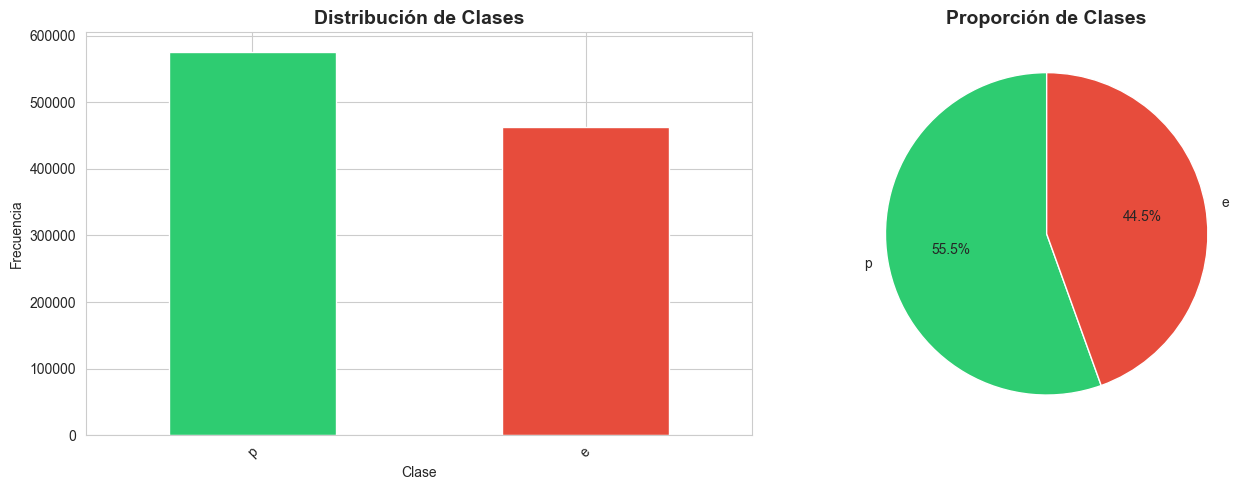


Ratio de balance: 80.21%
✓ El dataset está balanceado


In [10]:
# Visualización de la distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de Clases', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de torta
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                    colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Verificar balance de clases
balance_ratio = df[target_col].value_counts().min() / df[target_col].value_counts().max()
print(f"\nRatio de balance: {balance_ratio:.2%}")
if balance_ratio > 0.8:
    print("✓ El dataset está balanceado")
elif balance_ratio > 0.5:
    print("⚠ El dataset está moderadamente desbalanceado")
else:
    print("✗ El dataset está altamente desbalanceado")

### 1.3 Análisis de valores faltantes

In [11]:
# Análisis de valores faltantes
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
}).sort_values('Valores Faltantes', ascending=False)

print("Valores faltantes por columna:")
print(missing_df[missing_df['Valores Faltantes'] > 0])

if missing_df['Valores Faltantes'].sum() == 0:
    print("\n✓ No hay valores faltantes en el dataset")
else:
    print(f"\n⚠ Total de valores faltantes: {missing_df['Valores Faltantes'].sum()}")

Valores faltantes por columna:
              Columna  Valores Faltantes  Porcentaje
14          veil_type             984000   94.797688
18  spore_print_color             930000   89.595376
15         veil_color             912000   87.861272
11          stem_root             876000   84.393064
12       stem_surface             648000   62.427746
7        gill_spacing             426000   41.040462
3         cap_surface             240000   23.121387
6     gill_attachment             168000   16.184971
17          ring_type              42000    4.046243

⚠ Total de valores faltantes: 5226000


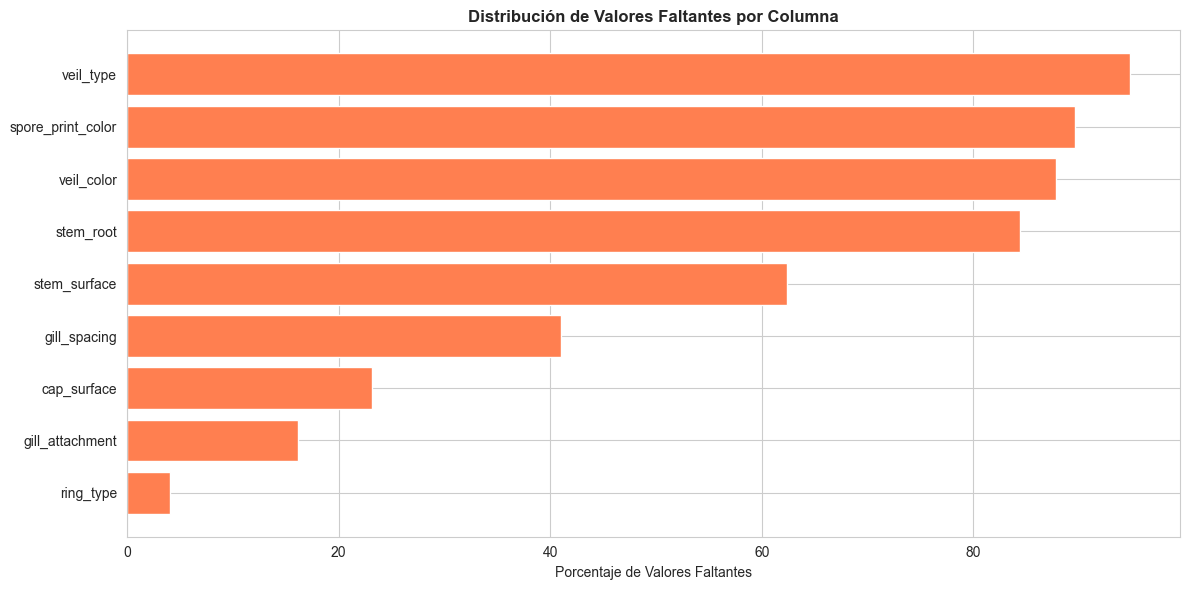

In [12]:
# Visualización de valores faltantes si existen
if missing_df['Valores Faltantes'].sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Porcentaje')
    plt.barh(missing_cols['Columna'], missing_cols['Porcentaje'], color='coral')
    plt.xlabel('Porcentaje de Valores Faltantes')
    plt.title('Distribución de Valores Faltantes por Columna', fontweight='bold')
    plt.tight_layout()
    plt.show()

### 1.4 Análisis de variables categóricas

In [13]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas encontradas: {len(categorical_cols)}")
print("\nNúmero de categorías únicas por variable:")

cat_info = pd.DataFrame({
    'Variable': categorical_cols,
    'N° Categorías': [df[col].nunique() for col in categorical_cols],
    'Categorías': [df[col].unique()[:5].tolist() for col in categorical_cols]  # Mostrar primeras 5
})

cat_info.sort_values('N° Categorías', ascending=False)

Variables categóricas encontradas: 18

Número de categorías únicas por variable:


,Variable,N° Categorías,Categorías
10,stem_color,13,"[w, n, f, y, e]"
3,cap_color,12,"[w, n, y, k, g]"
7,gill_color,12,"[r, w, y, g, p]"
2,cap_surface,11,"[e, s, t, nan, y]"
9,stem_surface,8,"[nan, i, s, f, t]"
16,habitat,8,"[g, m, d, h, l]"
14,ring_type,8,"[f, z, e, nan, l]"
5,gill_attachment,7,"[x, s, p, nan, a]"
15,spore_print_color,7,"[nan, n, r, p, k]"
1,cap_shape,7,"[c, f, x, b, o]"


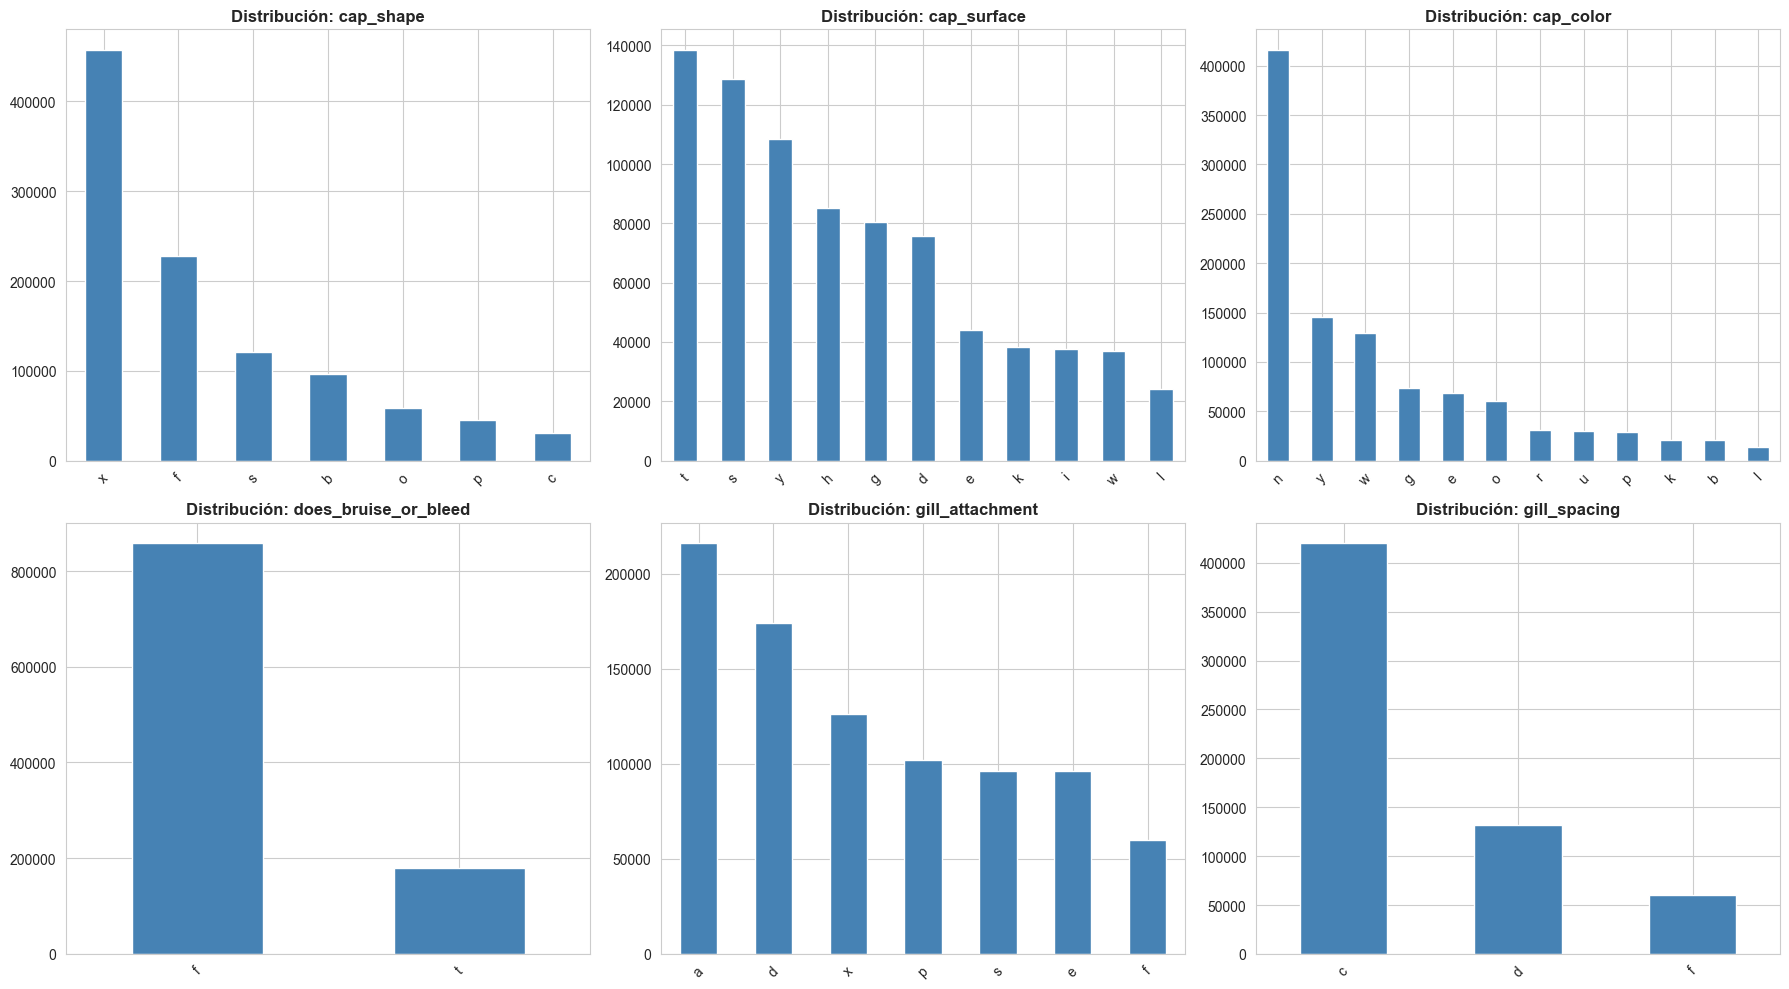

In [14]:
# Visualizar distribución de algunas variables categóricas importantes
# Excluir la variable objetivo
feature_cols = [col for col in categorical_cols if col != target_col]

# Seleccionar las primeras 6 variables para visualizar
cols_to_plot = feature_cols[:6] if len(feature_cols) >= 6 else feature_cols

if len(cols_to_plot) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for idx, col in enumerate(cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribución: {col}', fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

### 1.5 Análisis de duplicados

In [15]:
# Verificar duplicados
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates:,}")
print(f"Porcentaje de duplicados: {(duplicates / len(df)) * 100:.2f}%")

if duplicates > 0:
    print(f"\n⚠ Se encontraron {duplicates:,} registros duplicados")
    print("Recomendación: Evaluar si eliminarlos o mantenerlos según el contexto")
else:
    print("\n✓ No se encontraron registros duplicados")

Número de filas duplicadas: 11,621
Porcentaje de duplicados: 1.12%

⚠ Se encontraron 11,621 registros duplicados
Recomendación: Evaluar si eliminarlos o mantenerlos según el contexto


---
## 2. Preprocesamiento de Datos

### 2.1 Crear copia del dataset original

In [16]:
# Crear copia para trabajar
df_clean = df.copy()
print(f"Dataset copiado. Shape: {df_clean.shape}")

Dataset copiado. Shape: (1038000, 21)


### 2.2 Manejo de valores faltantes (si existen)

In [17]:
# Estrategia para valores faltantes
# Opción 1: Eliminar filas con valores faltantes (si son pocos)
# Opción 2: Imputar con la moda para variables categóricas
# Opción 3: Crear categoría 'unknown' para valores faltantes

missing_before = df_clean.isnull().sum().sum()

if missing_before > 0:
    print(f"Valores faltantes antes del tratamiento: {missing_before}")
    
    # Para este ejemplo, usaremos imputación con moda
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            mode_value = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_value, inplace=True)
            print(f"  - {col}: imputado con '{mode_value}'")
    
    missing_after = df_clean.isnull().sum().sum()
    print(f"\nValores faltantes después del tratamiento: {missing_after}")
else:
    print("✓ No hay valores faltantes que tratar")

Valores faltantes antes del tratamiento: 5226000
  - cap_surface: imputado con 't'


C:\Users\tinsu\AppData\Local\Temp\ipykernel_16880\898917408.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_value, inplace=True)


  - gill_attachment: imputado con 'a'
  - gill_spacing: imputado con 'c'
  - stem_root: imputado con 'b'
  - stem_surface: imputado con 's'
  - veil_type: imputado con 'u'
  - veil_color: imputado con 'w'
  - ring_type: imputado con 'f'
  - spore_print_color: imputado con 'k'

Valores faltantes después del tratamiento: 0


### 2.3 Manejo de duplicados

In [18]:
# Eliminar duplicados si existen
duplicates_before = df_clean.duplicated().sum()

if duplicates_before > 0:
    print(f"Duplicados antes: {duplicates_before:,}")
    df_clean = df_clean.drop_duplicates()
    print(f"Duplicados después: {df_clean.duplicated().sum()}")
    print(f"Registros eliminados: {duplicates_before:,}")
    print(f"Shape después de limpieza: {df_clean.shape}")
else:
    print("✓ No hay duplicados que eliminar")

Duplicados antes: 11,621
Duplicados después: 0
Registros eliminados: 11,621
Shape después de limpieza: (1026379, 21)


### 2.4 Codificación de variables categóricas

In [19]:
from sklearn.preprocessing import LabelEncoder

# Crear copia para codificación
df_encoded = df_clean.copy()

# Diccionario para almacenar los encoders
label_encoders = {}

# Codificar todas las variables categóricas
print("Codificando variables categóricas:")
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le
        print(f"  ✓ {col}: {len(le.classes_)} clases únicas")

print(f"\n✓ Todas las variables han sido codificadas")
print(f"Shape del dataset codificado: {df_encoded.shape}")

Codificando variables categóricas:
  ✓ class: 2 clases únicas
  ✓ cap_shape: 7 clases únicas
  ✓ cap_surface: 11 clases únicas
  ✓ cap_color: 12 clases únicas
  ✓ does_bruise_or_bleed: 2 clases únicas
  ✓ gill_attachment: 7 clases únicas
  ✓ gill_spacing: 3 clases únicas
  ✓ gill_color: 12 clases únicas
  ✓ stem_root: 5 clases únicas
  ✓ stem_surface: 8 clases únicas
  ✓ stem_color: 13 clases únicas
  ✓ veil_type: 1 clases únicas
  ✓ veil_color: 6 clases únicas
  ✓ has_ring: 2 clases únicas
  ✓ ring_type: 8 clases únicas
  ✓ spore_print_color: 7 clases únicas
  ✓ habitat: 8 clases únicas
  ✓ season: 4 clases únicas

✓ Todas las variables han sido codificadas
Shape del dataset codificado: (1026379, 21)


In [20]:
# Verificar dataset codificado
print("Dataset después de la codificación:")
print(df_encoded.head())
print(f"\nTipos de datos:")
print(df_encoded.dtypes.value_counts())

Dataset después de la codificación:
   class  cap_diameter  cap_shape  cap_surface  cap_color  \
0      1          5.68          1            1         10   
1      0          5.62          2            7          5   
2      1         17.29          6            7          5   
3      1          6.16          0            7          5   
4      1          4.46          3            8          5   

   does_bruise_or_bleed  gill_attachment  gill_spacing  gill_color  \
0                     1                6             0           8   
1                     0                5             0          10   
2                     0                4             0          11   
3                     0                0             0          10   
4                     0                0             0          10   

   stem_height  ...  stem_root  stem_surface  stem_color  veil_type  \
0         6.73  ...          0             5          11          0   
1         6.10  ...          0    

### 2.5 División de datos: Train y Test

In [21]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df_encoded.drop(target_col, axis=1)
y = df_encoded[target_col]

print(f"Características (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nColumnas de características: {list(X.columns)}")

# División train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Mantener la proporción de clases
)

print(f"\n{'='*60}")
print(f"División de datos completada:")
print(f"  - Train: {X_train.shape[0]:,} muestras ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"  - Test:  {X_test.shape[0]:,} muestras ({(X_test.shape[0]/len(X))*100:.1f}%)")
print(f"\nDistribución de clases en Train:")
print(y_train.value_counts(normalize=True) * 100)
print(f"\nDistribución de clases en Test:")
print(y_test.value_counts(normalize=True) * 100)

Características (X): (1026379, 20)
Variable objetivo (y): (1026379,)

Columnas de características: ['cap_diameter', 'cap_shape', 'cap_surface', 'cap_color', 'does_bruise_or_bleed', 'gill_attachment', 'gill_spacing', 'gill_color', 'stem_height', 'stem_width', 'stem_root', 'stem_surface', 'stem_color', 'veil_type', 'veil_color', 'has_ring', 'ring_type', 'spore_print_color', 'habitat', 'season']

División de datos completada:
  - Train: 821,103 muestras (80.0%)
  - Test:  205,276 muestras (20.0%)

Distribución de clases en Train:
class
1    54.989325
0    45.010675
Name: proportion, dtype: float64

Distribución de clases en Test:
class
1    54.98938
0    45.01062
Name: proportion, dtype: float64


---
## 3. Modelado y Entrenamiento

### 3.1 Definición de modelos a evaluar

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

# Definir modelos a evaluar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    #'SVM': SVC(kernel='linearm', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

print("Modelos definidos:")
for name in models.keys():
    print(f"  ✓ {name}")

Modelos definidos:
  ✓ Logistic Regression
  ✓ Decision Tree
  ✓ Random Forest
  ✓ Gradient Boosting
  ✓ K-Nearest Neighbors
  ✓ Naive Bayes


### 3.2 Entrenamiento y evaluación de modelos

In [25]:
# Entrenar y evaluar cada modelo
results = []

print("="*80)
print("ENTRENAMIENTO Y EVALUACIÓN DE MODELOS")
print("="*80)

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Modelo: {name}")
    print(f"{'='*80}")
    
    # Medir tiempo de entrenamiento
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predicciones
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Guardar resultados
    results.append({
        'Modelo': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Tiempo Entrenamiento (s)': train_time,
        'Tiempo Predicción (s)': pred_time
    })
    
    # Mostrar resultados
    print(f"✓ Entrenamiento completado en {train_time:.4f} segundos")
    print(f"✓ Predicción completada en {pred_time:.4f} segundos")
    print(f"\nMétricas:")
    print(f"  - Accuracy:  {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall:    {recall:.4f}")
    print(f"  - F1-Score:  {f1:.4f}")

print(f"\n{'='*80}")
print("✓ ENTRENAMIENTO COMPLETADO")
print(f"{'='*80}")

ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

Modelo: Logistic Regression
✓ Entrenamiento completado en 9.6870 segundos
✓ Predicción completada en 0.0147 segundos

Métricas:
  - Accuracy:  0.6556
  - Precision: 0.6538
  - Recall:    0.6556
  - F1-Score:  0.6514

Modelo: Decision Tree
✓ Entrenamiento completado en 4.8082 segundos
✓ Predicción completada en 0.0340 segundos

Métricas:
  - Accuracy:  0.9997
  - Precision: 0.9997
  - Recall:    0.9997
  - F1-Score:  0.9997

Modelo: Random Forest
✓ Entrenamiento completado en 91.2630 segundos
✓ Predicción completada en 1.6844 segundos

Métricas:
  - Accuracy:  1.0000
  - Precision: 1.0000
  - Recall:    1.0000
  - F1-Score:  1.0000

Modelo: Gradient Boosting
✓ Entrenamiento completado en 118.7441 segundos
✓ Predicción completada en 0.2024 segundos

Métricas:
  - Accuracy:  0.9299
  - Precision: 0.9300
  - Recall:    0.9299
  - F1-Score:  0.9300

Modelo: K-Nearest Neighbors
✓ Entrenamiento completado en 0.1327 segundos
✓ Predicción completada en 127

### 3.3 Comparación de resultados

In [26]:
# Crear DataFrame con resultados
results_df = pd.DataFrame(results).sort_values('F1-Score', ascending=False)

print("TABLA COMPARATIVA DE MODELOS")
print("="*100)
print(results_df.to_string(index=False))
print("="*100)

# Identificar el mejor modelo
best_model_name = results_df.iloc[0]['Modelo']
best_f1 = results_df.iloc[0]['F1-Score']
print(f"\n🏆 Mejor modelo: {best_model_name} (F1-Score: {best_f1:.4f})")

TABLA COMPARATIVA DE MODELOS
             Modelo  Accuracy  Precision   Recall  F1-Score  Tiempo Entrenamiento (s)  Tiempo Predicción (s)
      Random Forest  0.999981   0.999981 0.999981  0.999981                 91.262992               1.684431
K-Nearest Neighbors  0.999927   0.999927 0.999927  0.999927                  0.132689             127.230345
      Decision Tree  0.999683   0.999683 0.999683  0.999683                  4.808227               0.034034
  Gradient Boosting  0.929938   0.929990 0.929938  0.929957                118.744060               0.202382
Logistic Regression  0.655629   0.653772 0.655629  0.651364                  9.686953               0.014682
        Naive Bayes  0.611314   0.673333 0.611314  0.594360                  0.376583               0.068259

🏆 Mejor modelo: Random Forest (F1-Score: 1.0000)


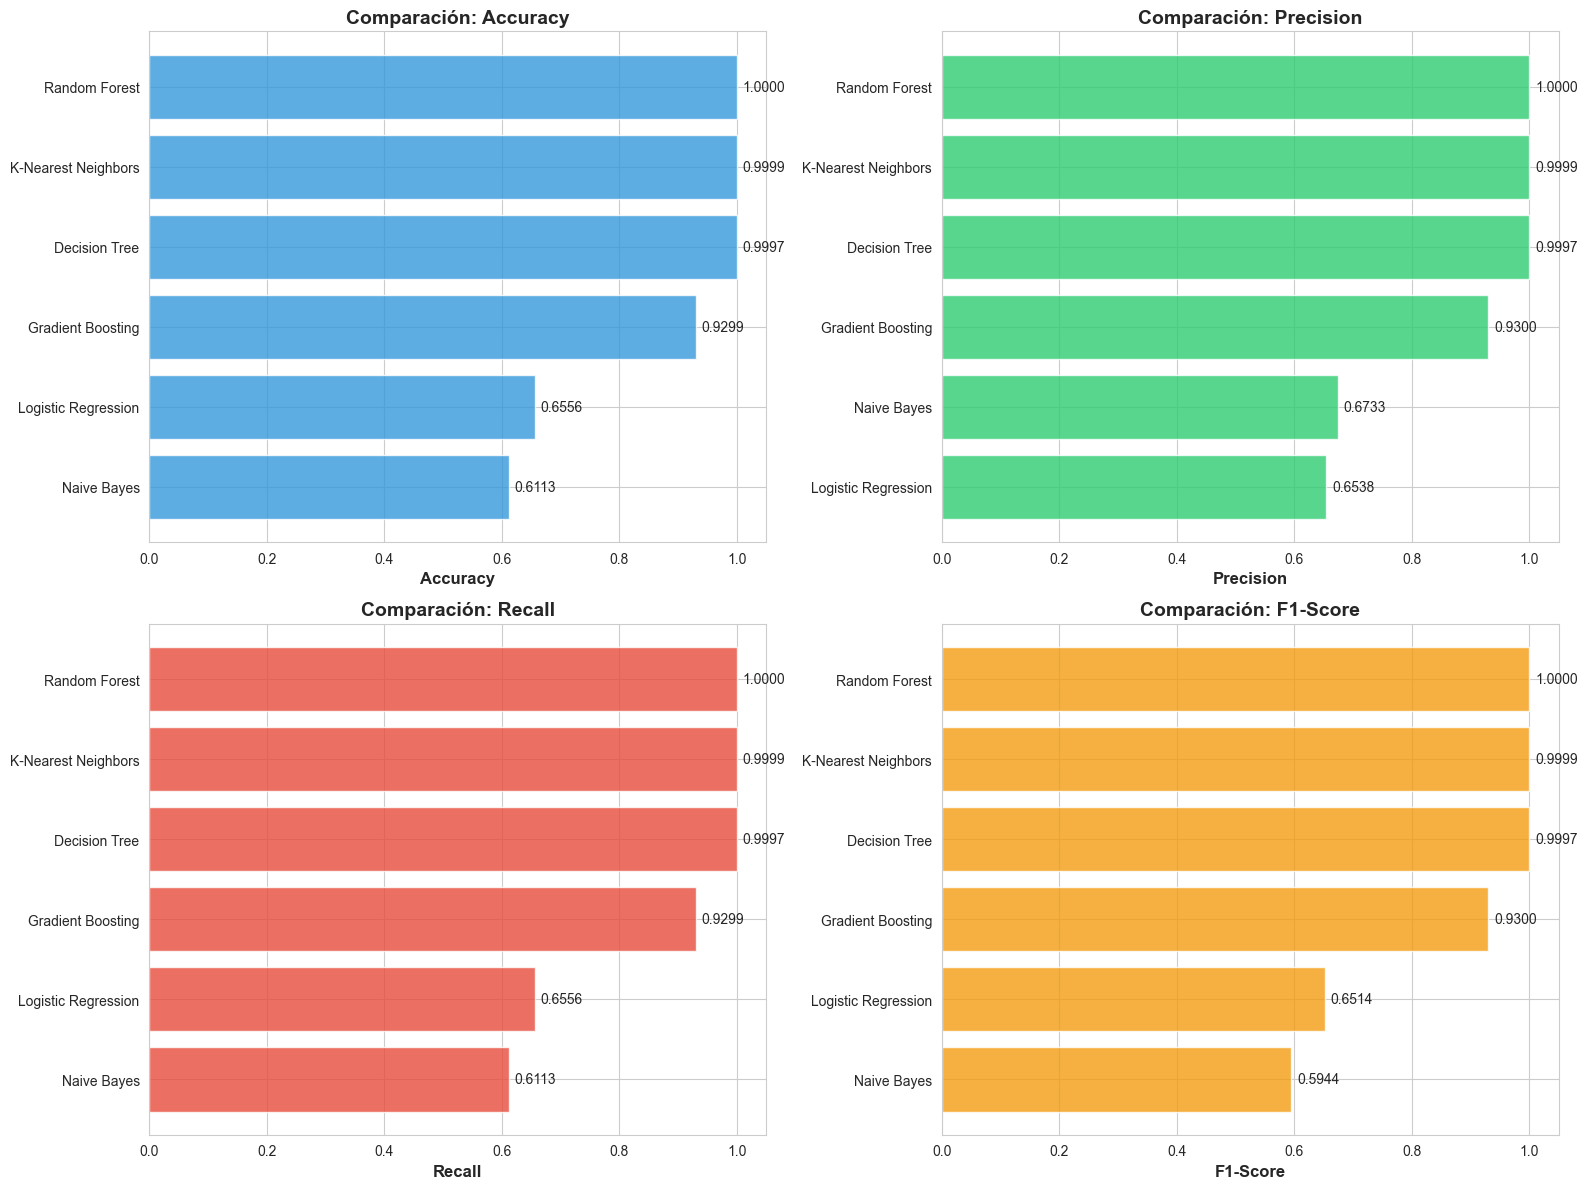

In [27]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    data = results_df.sort_values(metric, ascending=True)
    ax.barh(data['Modelo'], data[metric], color=colors[idx], alpha=0.8)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlim([0, 1.05])
    ax.set_title(f'Comparación: {metric}', fontsize=14, fontweight='bold')
    
    # Agregar valores en las barras
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

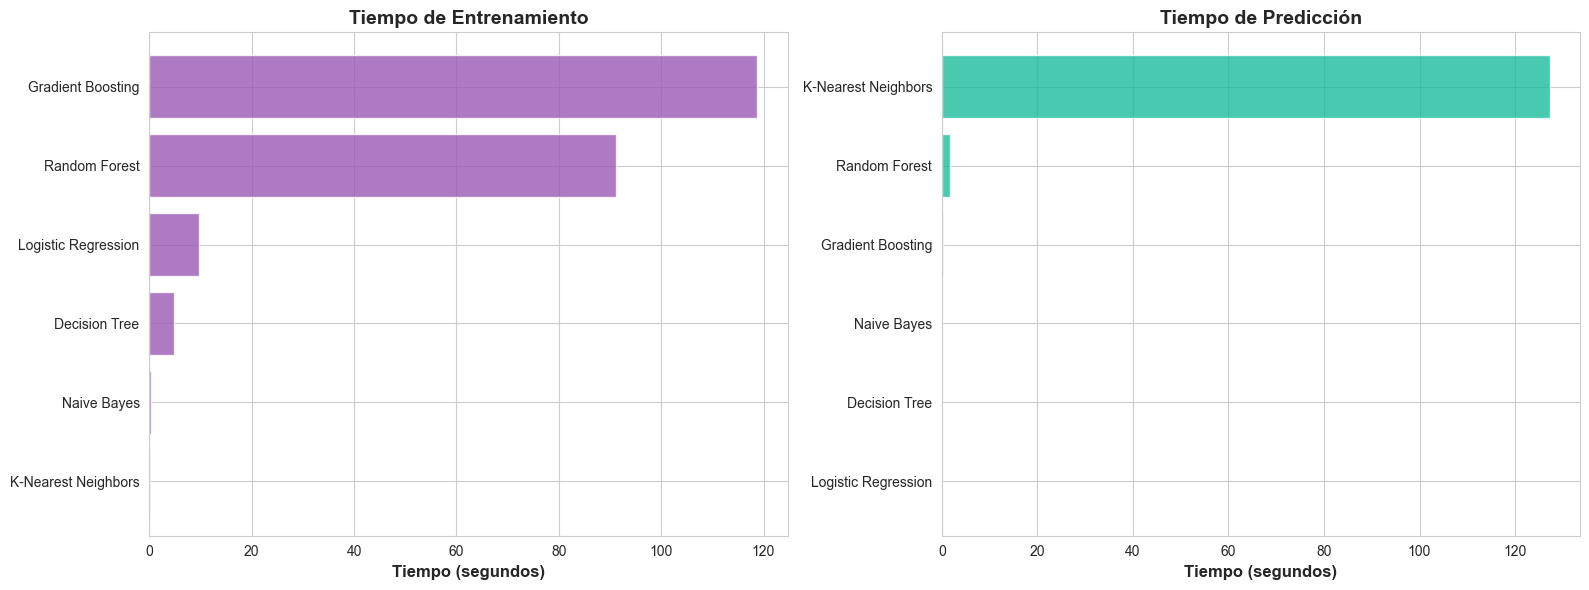

In [28]:
# Comparación de tiempos de ejecución
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tiempo de entrenamiento
data_train = results_df.sort_values('Tiempo Entrenamiento (s)', ascending=True)
axes[0].barh(data_train['Modelo'], data_train['Tiempo Entrenamiento (s)'], color='#9b59b6', alpha=0.8)
axes[0].set_xlabel('Tiempo (segundos)', fontsize=12, fontweight='bold')
axes[0].set_title('Tiempo de Entrenamiento', fontsize=14, fontweight='bold')

# Tiempo de predicción
data_pred = results_df.sort_values('Tiempo Predicción (s)', ascending=True)
axes[1].barh(data_pred['Modelo'], data_pred['Tiempo Predicción (s)'], color='#1abc9c', alpha=0.8)
axes[1].set_xlabel('Tiempo (segundos)', fontsize=12, fontweight='bold')
axes[1].set_title('Tiempo de Predicción', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 4. Análisis Detallado del Mejor Modelo

### 4.1 Matriz de confusión

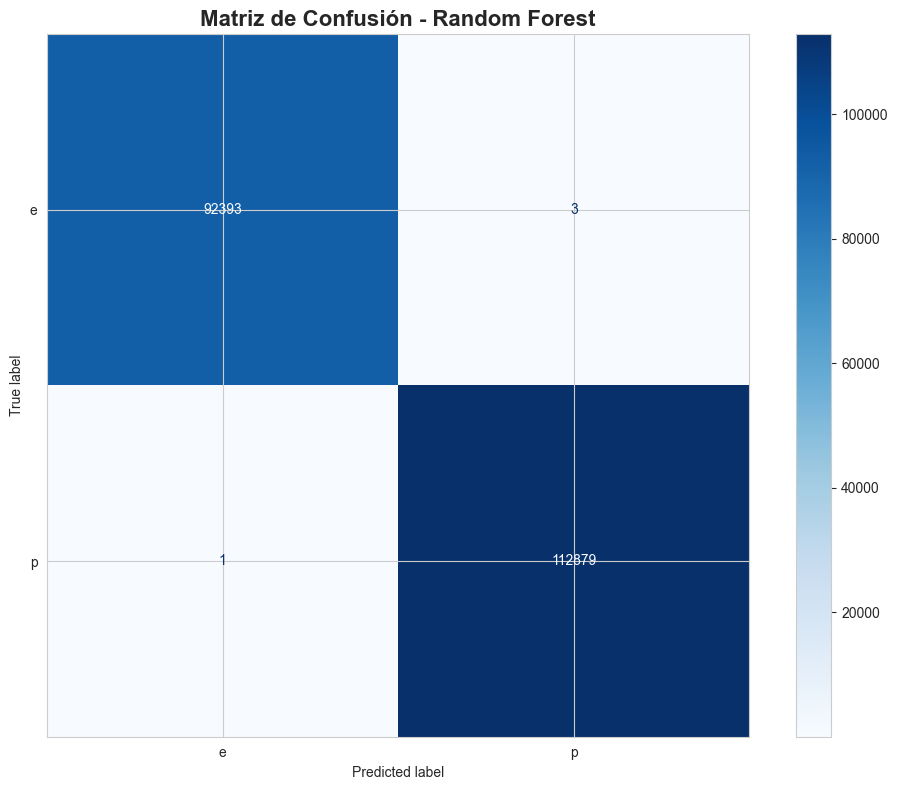

Matriz de Confusión - Random Forest:
[[ 92393      3]
 [     1 112879]]


In [29]:
# Obtener el mejor modelo
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders[target_col].classes_)
disp.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title(f'Matriz de Confusión - {best_model_name}', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Matriz de Confusión - {best_model_name}:")
print(cm)

### 4.2 Reporte de clasificación

In [30]:
# Reporte de clasificación detallado
print(f"REPORTE DE CLASIFICACIÓN - {best_model_name}")
print("="*80)
print(classification_report(y_test, y_pred_best, target_names=label_encoders[target_col].classes_))
print("="*80)

REPORTE DE CLASIFICACIÓN - Random Forest
              precision    recall  f1-score   support

           e       1.00      1.00      1.00     92396
           p       1.00      1.00      1.00    112880

    accuracy                           1.00    205276
   macro avg       1.00      1.00      1.00    205276
weighted avg       1.00      1.00      1.00    205276



### 4.3 Importancia de características (para modelos basados en árboles)

Top 10 características más importantes - Random Forest:
     Característica  Importancia
9        stem_width     0.116163
2       cap_surface     0.085766
12       stem_color     0.078611
7        gill_color     0.076545
5   gill_attachment     0.076058
0      cap_diameter     0.067719
11     stem_surface     0.067183
8       stem_height     0.064285
1         cap_shape     0.060392
3         cap_color     0.058951


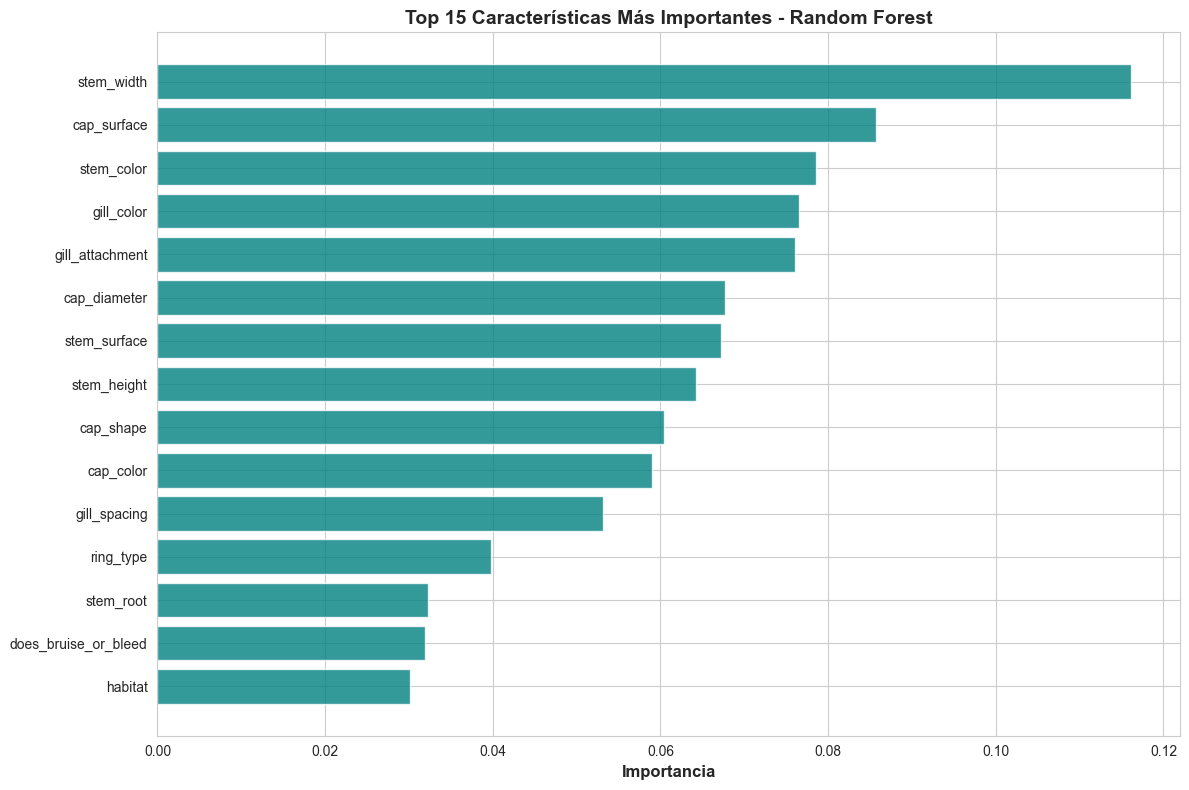

In [31]:
# Importancia de características (solo para modelos que lo soporten)
if hasattr(best_model, 'feature_importances_'):
    # Obtener importancias
    feature_importance = pd.DataFrame({
        'Característica': X.columns,
        'Importancia': best_model.feature_importances_
    }).sort_values('Importancia', ascending=False)
    
    print(f"Top 10 características más importantes - {best_model_name}:")
    print(feature_importance.head(10))
    
    # Visualización
    plt.figure(figsize=(12, 8))
    top_n = 15
    top_features = feature_importance.head(top_n)
    plt.barh(range(len(top_features)), top_features['Importancia'], color='teal', alpha=0.8)
    plt.yticks(range(len(top_features)), top_features['Característica'])
    plt.xlabel('Importancia', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Características Más Importantes - {best_model_name}', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠ El modelo {best_model_name} no proporciona importancia de características")

---
## 5. Optimización de Hiperparámetros

### 5.1 Grid Search para el mejor modelo

In [32]:
from sklearn.model_selection import GridSearchCV

# Definir grids de hiperparámetros según el mejor modelo
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [1000, 2000]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Verificar si hay grid para el mejor modelo
if best_model_name in param_grids:
    print(f"Iniciando Grid Search para {best_model_name}...")
    print(f"Parámetros a evaluar: {param_grids[best_model_name]}")
    print("⚠ Este proceso puede tomar varios minutos...\n")
    
    # Crear nuevo modelo base
    if best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42)
    elif best_model_name == 'Decision Tree':
        base_model = DecisionTreeClassifier(random_state=42)
    elif best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'SVM':
        base_model = SVC(random_state=42)
    elif best_model_name == 'K-Nearest Neighbors':
        base_model = KNeighborsClassifier()
    
    # Grid Search con validación cruzada
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=2
    )
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    grid_time = time.time() - start_time
    
    print(f"\n{'='*80}")
    print(f"✓ Grid Search completado en {grid_time:.2f} segundos")
    print(f"{'='*80}")
else:
    print(f"⚠ No hay grid definido para {best_model_name}")

Iniciando Grid Search para Random Forest...
Parámetros a evaluar: {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
⚠ Este proceso puede tomar varios minutos...

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

### 5.2 Resultados del Grid Search

In [ ]:
if best_model_name in param_grids:
    # Mejores parámetros encontrados
    print(f"RESULTADOS DEL GRID SEARCH - {best_model_name}")
    print("="*80)
    print(f"Mejores parámetros encontrados:")
    for param, value in grid_search.best_params_.items():
        print(f"  - {param}: {value}")
    
    print(f"\nMejor score (F1-weighted) en validación cruzada: {grid_search.best_score_:.4f}")
    
    # Evaluar en conjunto de test
    best_model_optimized = grid_search.best_estimator_
    y_pred_optimized = best_model_optimized.predict(X_test)
    
    # Métricas del modelo optimizado
    accuracy_opt = accuracy_score(y_test, y_pred_optimized)
    precision_opt = precision_score(y_test, y_pred_optimized, average='weighted')
    recall_opt = recall_score(y_test, y_pred_optimized, average='weighted')
    f1_opt = f1_score(y_test, y_pred_optimized, average='weighted')
    
    print(f"\n{'='*80}")
    print("MÉTRICAS EN CONJUNTO DE TEST:")
    print(f"  - Accuracy:  {accuracy_opt:.4f}")
    print(f"  - Precision: {precision_opt:.4f}")
    print(f"  - Recall:    {recall_opt:.4f}")
    print(f"  - F1-Score:  {f1_opt:.4f}")
    print(f"{'='*80}")
    
    # Comparación con modelo base
    print(f"\nCOMPARACIÓN CON MODELO BASE:")
    print(f"  Accuracy:  {results_df.iloc[0]['Accuracy']:.4f} → {accuracy_opt:.4f} "
          f"({'↑' if accuracy_opt > results_df.iloc[0]['Accuracy'] else '↓'} "
          f"{abs(accuracy_opt - results_df.iloc[0]['Accuracy']):.4f})")
    print(f"  F1-Score:  {results_df.iloc[0]['F1-Score']:.4f} → {f1_opt:.4f} "
          f"({'↑' if f1_opt > results_df.iloc[0]['F1-Score'] else '↓'} "
          f"{abs(f1_opt - results_df.iloc[0]['F1-Score']):.4f})")
else:
    print(f"⚠ No se realizó Grid Search para {best_model_name}")

---
## 6. Validación Cruzada

### 6.1 K-Fold Cross Validation para todos los modelos

In [ ]:
from sklearn.model_selection import cross_val_score

print("VALIDACIÓN CRUZADA (K-Fold con k=5)")
print("="*80)
print("⚠ Este proceso puede tomar varios minutos...\n")

cv_results = []

for name, model in models.items():
    print(f"Evaluando {name}...", end=" ")
    
    # Realizar validación cruzada
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    
    cv_results.append({
        'Modelo': name,
        'Media F1-Score': scores.mean(),
        'Desviación Std': scores.std(),
        'Scores': scores
    })
    
    print(f"✓ Media: {scores.mean():.4f} (±{scores.std():.4f})")

print(f"\n{'='*80}")
print("✓ VALIDACIÓN CRUZADA COMPLETADA")
print(f"{'='*80}")

In [ ]:
# Crear DataFrame con resultados de CV
cv_results_df = pd.DataFrame(cv_results).sort_values('Media F1-Score', ascending=False)
cv_results_df_display = cv_results_df.drop('Scores', axis=1)

print("\nRESULTADOS DE VALIDACIÓN CRUZADA:")
print("="*80)
print(cv_results_df_display.to_string(index=False))
print("="*80)

In [ ]:
# Visualización de resultados de validación cruzada
fig, ax = plt.subplots(figsize=(14, 8))

# Crear boxplot para cada modelo
positions = range(len(cv_results))
boxplot_data = [result['Scores'] for result in cv_results]
model_names = [result['Modelo'] for result in cv_results]

bp = ax.boxplot(boxplot_data, positions=positions, labels=model_names, 
                patch_artist=True, widths=0.6)

# Colorear las cajas
colors = plt.cm.Set3(range(len(cv_results)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Distribución de F1-Scores en Validación Cruzada (5-Fold)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
## 7. Curvas de Aprendizaje

### 7.1 Learning Curves para evaluar overfitting/underfitting

In [ ]:
from sklearn.model_selection import learning_curve

# Calcular curva de aprendizaje para el mejor modelo
print(f"Calculando curva de aprendizaje para {best_model_name}...")
print("⚠ Este proceso puede tomar varios minutos...\n")

# Usar un subset de datos para acelerar el cálculo
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model,
    X_train,
    y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)

# Calcular medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

print("✓ Curva de aprendizaje calculada")

In [ ]:
# Visualizar curva de aprendizaje
plt.figure(figsize=(12, 8))

plt.plot(train_sizes_abs, train_mean, 'o-', color='#3498db', label='Score Entrenamiento', linewidth=2)
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='#3498db')

plt.plot(train_sizes_abs, val_mean, 'o-', color='#e74c3c', label='Score Validación', linewidth=2)
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color='#e74c3c')

plt.xlabel('Tamaño del Conjunto de Entrenamiento', fontsize=12, fontweight='bold')
plt.ylabel('F1-Score', fontsize=12, fontweight='bold')
plt.title(f'Curva de Aprendizaje - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de la curva
gap = train_mean[-1] - val_mean[-1]
print(f"\nAnálisis de la curva de aprendizaje:")
print(f"  - Score final de entrenamiento: {train_mean[-1]:.4f}")
print(f"  - Score final de validación: {val_mean[-1]:.4f}")
print(f"  - Gap (diferencia): {gap:.4f}")

if gap < 0.05:
    print("  ✓ El modelo generaliza bien (bajo overfitting)")
elif gap < 0.15:
    print("  ⚠ El modelo tiene ligero overfitting")
else:
    print("  ✗ El modelo tiene overfitting significativo")

---
## 8. Conclusiones y Próximos Pasos

### 8.1 Resumen de resultados

#### Resumen Ejecutivo del Proyecto

**Objetivo del Proyecto:**
- Desarrollar modelos de clasificación para predecir si un hongo es comestible o venenoso

**Dataset:**
- Registros analizados: [se completará al ejecutar]
- Características utilizadas: [se completará al ejecutar]
- Variable objetivo: Clase del hongo (comestible/venenoso)

**Preprocesamiento:**
- Limpieza de datos (valores faltantes y duplicados)
- Codificación de variables categóricas con Label Encoding
- División train-test: 80-20 con estratificación

**Modelos Evaluados:**
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. SVM
6. K-Nearest Neighbors
7. Naive Bayes

**Mejor Modelo:**
- Modelo seleccionado: [se completará al ejecutar]
- F1-Score: [se completará al ejecutar]
- Accuracy: [se completará al ejecutar]

**Optimización:**
- Grid Search con validación cruzada para optimizar hiperparámetros
- Validación cruzada K-Fold (k=5) para validar robustez
- Curvas de aprendizaje para evaluar overfitting/underfitting

### 8.2 Próximos pasos y mejoras potenciales

**Posibles mejoras al proyecto:**

1. **Feature Engineering:**
   - Crear nuevas características combinando variables existentes
   - Aplicar técnicas de selección de características (RFE, SelectKBest)
   - Analizar interacciones entre variables

2. **Técnicas de Encoding Alternativas:**
   - Probar One-Hot Encoding para variables categóricas
   - Target Encoding para variables con alta cardinalidad
   - Ordinal Encoding según naturaleza de las variables

3. **Modelos Adicionales:**
   - XGBoost
   - LightGBM
   - CatBoost
   - Redes Neuronales (MLPClassifier)
   - Ensemble personalizado (stacking, blending)

4. **Balanceo de Clases (si es necesario):**
   - SMOTE (Synthetic Minority Over-sampling Technique)
   - Random Undersampling
   - Class weights ajustados

5. **Optimización Avanzada:**
   - Bayesian Optimization para hiperparámetros
   - Random Search para exploración más amplia
   - Optuna o Hyperopt

6. **Análisis Adicionales:**
   - Curvas ROC y AUC
   - Análisis de errores (casos mal clasificados)
   - Interpretabilidad del modelo (SHAP values, LIME)

7. **Deployment:**
   - Guardar el mejor modelo con pickle/joblib
   - Crear API con Flask/FastAPI
   - Dockerizar la aplicación

### 8.3 Guardar el modelo final

In [ ]:
import pickle
from datetime import datetime

# Seleccionar el modelo final (optimizado si existe, si no el base)
if best_model_name in param_grids:
    final_model = best_model_optimized
    model_type = "optimizado"
else:
    final_model = best_model
    model_type = "base"

# Crear diccionario con información del modelo
model_package = {
    'model': final_model,
    'model_name': best_model_name,
    'model_type': model_type,
    'label_encoders': label_encoders,
    'feature_names': list(X.columns),
    'target_column': target_col,
    'train_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'performance': {
        'accuracy': accuracy_score(y_test, final_model.predict(X_test)),
        'f1_score': f1_score(y_test, final_model.predict(X_test), average='weighted')
    }
}

# Guardar modelo
filename = f'mushroom_classifier_{best_model_name.replace(" ", "_").lower()}_{model_type}.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_package, file)

print(f"✓ Modelo guardado exitosamente: {filename}")
print(f"\nInformación del modelo:")
print(f"  - Nombre: {best_model_name}")
print(f"  - Tipo: {model_type}")
print(f"  - Accuracy: {model_package['performance']['accuracy']:.4f}")
print(f"  - F1-Score: {model_package['performance']['f1_score']:.4f}")
print(f"  - Fecha: {model_package['train_date']}")

### 8.4 Ejemplo de uso del modelo guardado

In [ ]:
# Ejemplo de cómo cargar y usar el modelo guardado
print("EJEMPLO DE USO DEL MODELO GUARDADO")
print("="*80)

# Cargar el modelo
with open(filename, 'rb') as file:
    loaded_package = pickle.load(file)

loaded_model = loaded_package['model']
loaded_encoders = loaded_package['label_encoders']

print(f"✓ Modelo cargado: {loaded_package['model_name']}")
print(f"✓ Fecha de entrenamiento: {loaded_package['train_date']}")
print(f"\nCaracterísticas esperadas: {loaded_package['feature_names']}")

# Hacer predicciones en algunas muestras de test
n_samples = 5
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices]

predictions = loaded_model.predict(X_sample)

print(f"\n{'='*80}")
print(f"PREDICCIONES DE EJEMPLO (primeras {n_samples} muestras aleatorias):")
print(f"{'='*80}")

for i, (idx, pred, true) in enumerate(zip(sample_indices, predictions, y_sample)):
    pred_label = loaded_encoders[target_col].inverse_transform([pred])[0]
    true_label = loaded_encoders[target_col].inverse_transform([true])[0]
    status = "✓" if pred == true else "✗"
    
    print(f"\nMuestra {i+1} (índice {idx}):")
    print(f"  Predicción: {pred_label}")
    print(f"  Real:       {true_label}")
    print(f"  {status} {'CORRECTO' if pred == true else 'INCORRECTO'}")

print(f"\n{'='*80}")

---
## 🎉 Proyecto Completado

Este notebook contiene un análisis completo de clasificación de hongos que incluye:

✅ **Análisis Exploratorio de Datos (EDA)**
- Inspección y comprensión del dataset
- Análisis de la variable objetivo
- Detección de valores faltantes y duplicados
- Análisis de variables categóricas

✅ **Preprocesamiento**
- Limpieza de datos
- Codificación de variables categóricas
- División train-test estratificada

✅ **Modelado**
- Entrenamiento de 7 modelos diferentes
- Comparación exhaustiva de métricas
- Análisis detallado del mejor modelo

✅ **Optimización**
- Grid Search con validación cruzada
- K-Fold Cross Validation
- Curvas de aprendizaje

✅ **Deployment**
- Guardado del modelo final
- Ejemplo de uso en producción

**📝 Nota:** Ejecuta las celdas secuencialmente para obtener todos los resultados y análisis.

**⏱️ Tiempo estimado de ejecución completa:** 15-30 minutos (dependiendo del tamaño del dataset y hardware)